In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px #graphing
import missingno as msno #describe data
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba-draft-basketball-player-data-19892021/nbaplayersdraft.csv


In [2]:
df = pd.read_csv("/kaggle/input/nba-draft-basketball-player-data-19892021/nbaplayersdraft.csv")

In [3]:
df.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [5]:
df.columns

Index(['id', 'year', 'rank', 'overall_pick', 'team', 'player', 'college',
       'years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
       'assists', 'field_goal_percentage', '3_point_percentage',
       'free_throw_percentage', 'average_minutes_played', 'points_per_game',
       'average_total_rebounds', 'average_assists', 'win_shares',
       'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement'],
      dtype='object')

# t-SNE 

In [6]:
columns = ['years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
           'assists', 'field_goal_percentage', '3_point_percentage',
           'free_throw_percentage', 'average_minutes_played', 'points_per_game',
           'average_total_rebounds', 'average_assists', 'win_shares',
           'win_shares_per_48_minutes', 'box_plus_minus',
           'value_over_replacement']

data = df[columns].dropna()

In [7]:
from sklearn.manifold import TSNE


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [9]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [10]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['player'] = df['player']


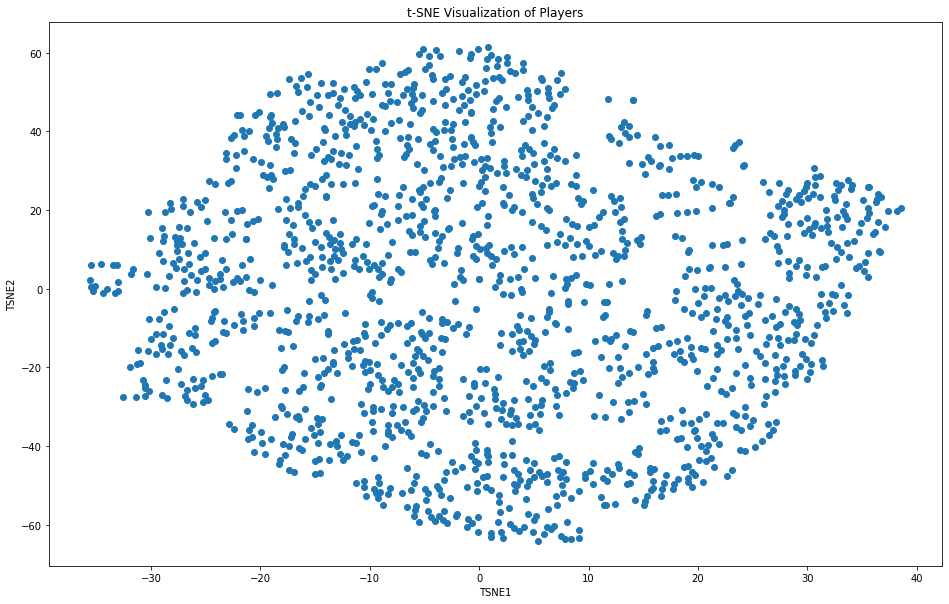

In [14]:
plt.figure(figsize=(16, 10))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'])

# for i in range(len(df_tsne)):
#     plt.text(df_tsne['TSNE1'][i], df_tsne['TSNE2'][i], df_tsne['player'][i], fontsize=9)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE Visualization of Players')
plt.show()
